In [44]:
import spacy
import random 
from spacy import util
from spacy.tokens import Doc
from spacy.training import Example
from spacy.language import Language
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fast')


In [45]:
df1 = pd.read_excel(r'E:\Graduation Project\my\data scrabing\data_out\Technology Skills.xlsx')
df1.head()

,O*NET-SOC Code,Title,Example,Commodity Code,Commodity Title,Hot Technology
0,11-1011.00,Chief Executives,Adobe Systems Adobe Acrobat,43232202,Document management software,Y
1,11-1011.00,Chief Executives,AdSense Tracker,43232306,Data base user interface and query software,N
2,11-1011.00,Chief Executives,Atlassian JIRA,43232201,Content workflow software,Y
3,11-1011.00,Chief Executives,Blackbaud The Raiser's Edge,43232303,Customer relationship management CRM software,Y
4,11-1011.00,Chief Executives,ComputerEase Construction Accounting,43231601,Accounting software,N


In [46]:
df1_jobs = df1['Title'].value_counts()
df1_jobs

Software Developers, Applications                        328
Information Technology Project Managers                  307
Computer Systems Analysts                                283
Computer Programmers                                     281
Computer Network Architects                              270
                                                        ... 
Rail-Track Laying and Maintenance Equipment Operators      3
Manufactured Building and Mobile Home Installers           3
Pipelayers                                                 2
Food Cooking Machine Operators and Tenders                 1
Dishwashers                                                1
Name: Title, Length: 973, dtype: int64

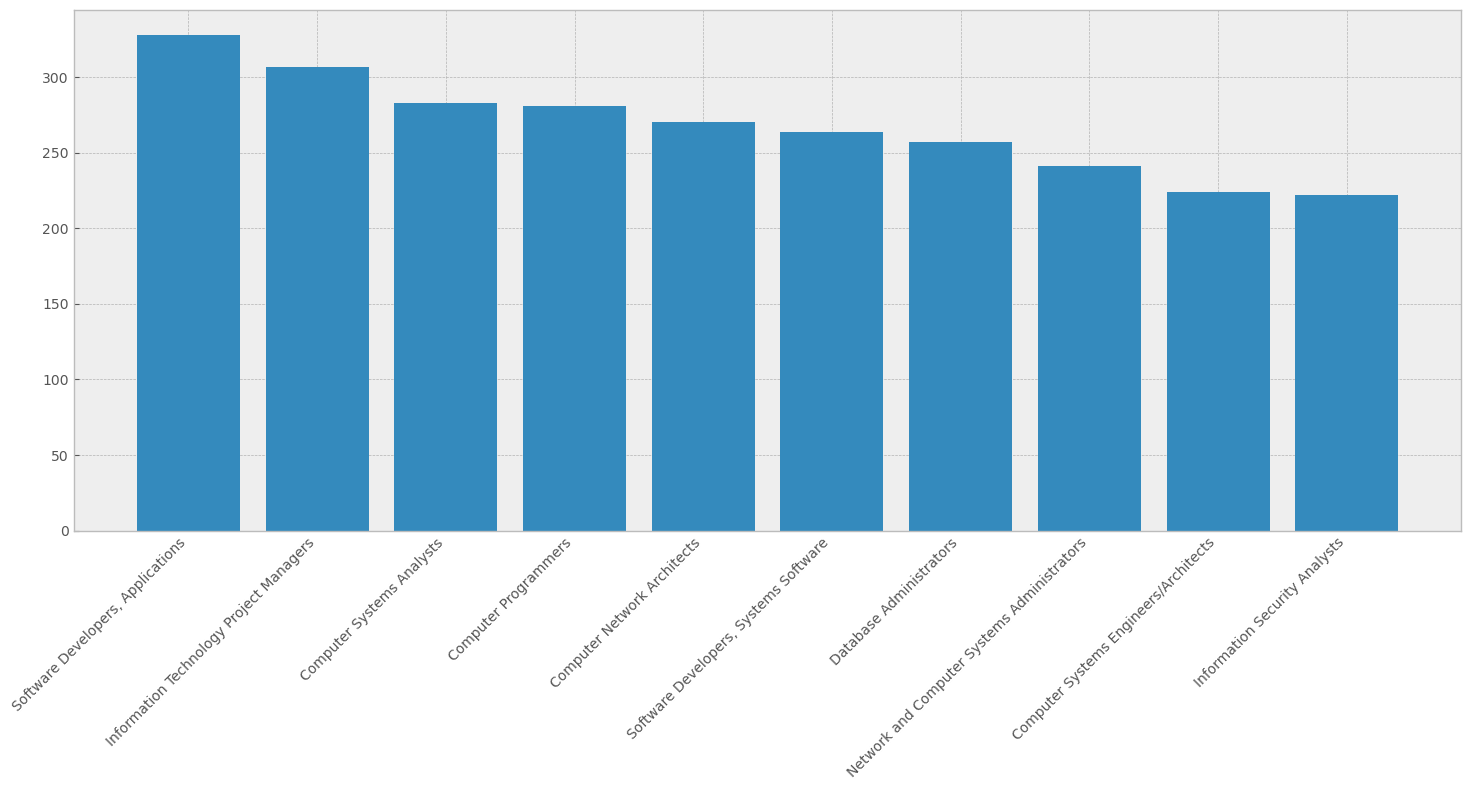

In [47]:
plt.figure(figsize=(15,8))
plt.bar(df1_jobs.keys()[0:10],df1_jobs[0:10],align='center')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and ha (horizontal alignment) as needed
plt.tight_layout()


In [48]:
df1_skills = set(df1['Example'])

In [49]:
df2 = pd.read_csv(r'E:\Graduation Project\my\data scrabing\data_out\Wuzzuf_Jobs.csv')
df2.head()

,Title,Company,Location,Type,Level,YearsExp,Country,Skills
0,Customer Service Agent,Johnson Controls,New Cairo,Full Time,Entry Level,1-3 Yrs of Exp,Cairo,"Call Center, Customer Support, Customer Care, ..."
1,Marketing Manager,SYE English Community,Dokki,Full Time,Manager,5-10 Yrs of Exp,Giza,"Market Research, Social Media, Online Marketin..."
2,Medical Representative Heliopolis,So Value Pharma,Cairo,Full Time,Entry Level,0-5 Yrs of Exp,Egypt,"Cardio-metabolic, Sales Skills, Sales Target, ..."
3,Order Handling Specialist,Johnson Controls,New Cairo,Full Time,Experienced,3-5 Yrs of Exp,Cairo,"Supply Officer, Supply Planner, Procurement an..."
4,Storekeeper,Confidential,Cairo,Full Time,Experienced,3+ Yrs of Exp,Egypt,"Warehousing, Storekeeping, Logistics/Supply Chain"


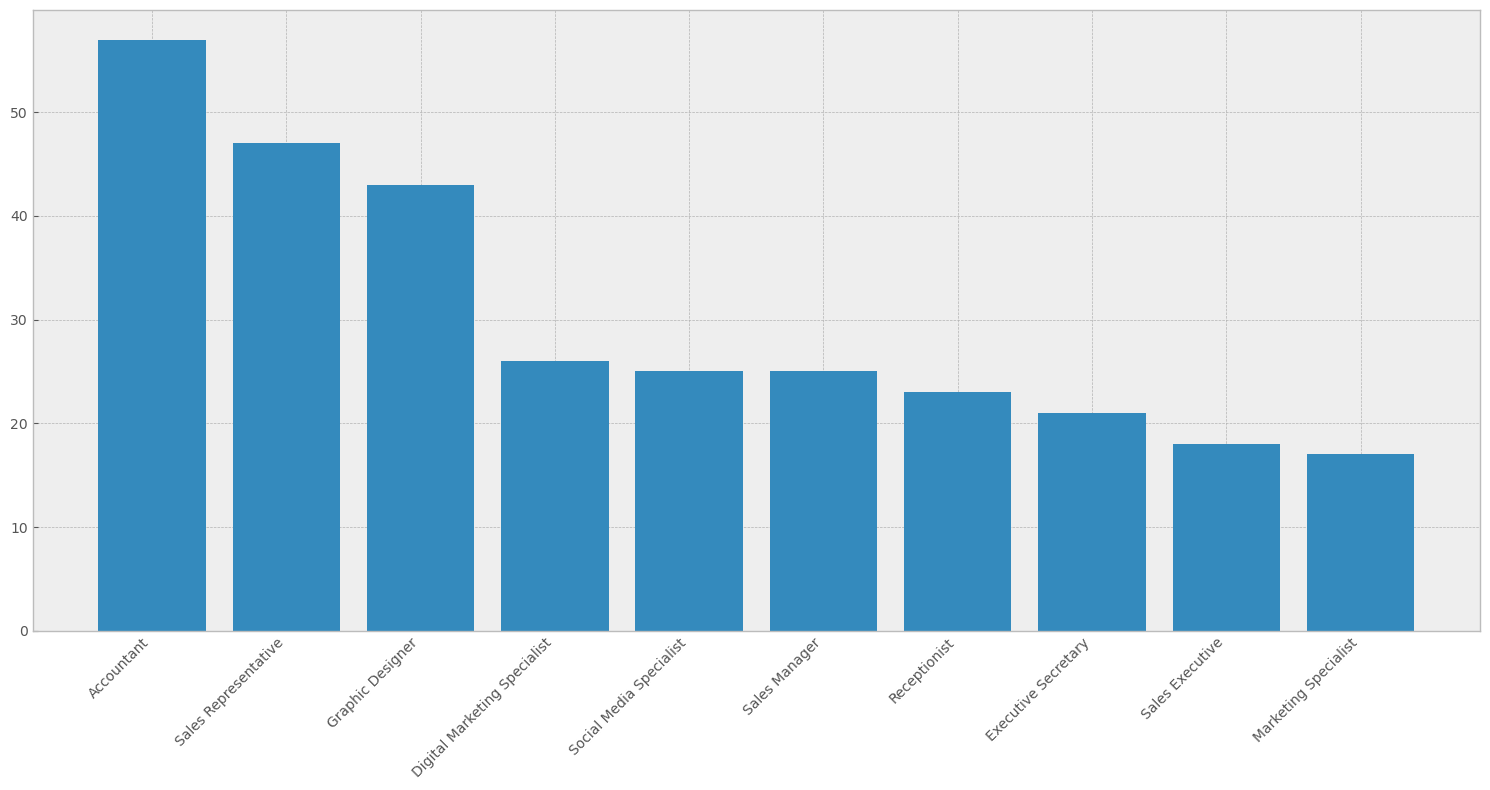

In [50]:
df2_jobs = df2['Title'].value_counts()
plt.figure(figsize=(15,8))
plt.bar(df2_jobs.keys()[0:10],df2_jobs[0:10],align='center')
plt.xticks(rotation=45, ha='right')  # Adjust the rotation angle and ha (horizontal alignment) as needed
plt.tight_layout()


In [51]:
skills = df2['Skills']
df2_skills = set()
for skill in skills:
    split_skills = skill.split(',')
    for s in split_skills:
        df2_skills.add(s)
df2_skills


{'Retail Manager',
 '',
 ' SaSS',
 ' Treasury Accounting',
 ' Disposables',
 'development',
 ' SDK',
 ' Technical Analysis',
 ' Laboratory',
 ' Metal Furniture',
 ' iOS',
 ' Microsoft Exchange',
 ' Demand Generation Marketing',
 ' Website Back Office',
 ' Convenience Stores',
 'Promoter',
 ' Oil &Gas',
 ' Microsoft Dynamics CRM',
 ' TCP/IP & Protocols',
 ' CCDP',
 ' Admin Work',
 ' Twinmotion',
 ' Front Office',
 '3DMAX',
 ' 2D AutoCad',
 'Construction Management',
 '300 Vacancies',
 ' Electrical Connections',
 ' Infrastructure',
 ' Spareparts',
 ' Microsoft Outlook',
 ' Factory',
 'Deep Learning',
 ' Constructions',
 ' VueJs',
 ' PSI',
 ' AP Accounting',
 ' Tendring',
 ' TroubleShooting',
 ' International Sales',
 'Finishing Works',
 ' Agricultural Botany',
 ' Sales & Marketing',
 ' American Accent',
 ' Structural',
 ' Culinary Science',
 ' Females Only',
 ' Wireframes',
 ' DCS',
 'Indoor Sales',
 ' Contracts',
 ' Mechatronics',
 ' Agriculture Engineering',
 ' Designer',
 ' Commercial

In [52]:
df3 = pd.read_csv(r'E:\Graduation Project\my\data scrabing\data_out\skills.csv')
df3.head()

,Skill
0,supply chain engineering\n
1,bullet\n
2,commutations\n
3,pay equity\n
4,student retention\n


In [57]:
def replace_(text):
    text = text.replace('\n','')
    return text
df3['Skill'] = df3['Skill'].apply(replace_)
df3_skills = set(df3['Skill'])
df3_skills

{'career transition services',
 'evolution',
 'yoga instruction',
 'freight payment',
 'process monitoring',
 'values-based leadership',
 'linguistic anthropology',
 'ertms',
 'business method patents',
 'real estate owned (reo)',
 'report production',
 'construction consulting',
 'practice management',
 'zephyr style advisor',
 'lovely',
 'gc-ms',
 'trade show representation',
 'multidevice design',
 'internet recruiting',
 'cag',
 'retirement villages',
 'ibm db2',
 'bioprocess',
 'oracle xe',
 'plink',
 'paper management',
 'product classification',
 'fire extinguisher',
 'sheq',
 'icd-9-cm',
 'art education',
 'uim',
 'marketing budget management',
 'business restructures',
 'dmms',
 'waiting',
 'calming',
 'mainframe architecture',
 'logic design',
 'fixed price',
 'ethernet over sdh',
 'environmental studies',
 'spread trading',
 'value realization',
 'financial freedom',
 'defense travel system',
 'object modelling',
 'checkpoint',
 'corel office',
 'tomorrow',
 'caissons',
 'mo

In [59]:
df4 = pd.read_csv(r'E:\Graduation Project\my\data scrabing\data_out\all_data_skill_and_nonskills\skills.csv')
df4.head()

,Text,Label
0,thompson drop,1
1,description,0
2,hiring - bulk,1
3,send,0
4,epi 6,1


In [61]:
df4 = df4[df4['Label']==1]
df4.head()

,Text,Label
0,thompson drop,1
2,hiring - bulk,1
4,epi 6,1
6,customer need,1
8,trading application,1


In [63]:
df4_skills = set(df4['Text'])
df4_skills

{nan,
 'xamarin developer',
 'freight payment',
 'yoga instruction',
 'values-based leadership',
 'unix shellscripting',
 'real estate owned (reo)',
 'radware link proof devices',
 'commis i',
 'practice management',
 'tpa billing',
 'indirect taxes',
 'mpv',
 'gc-ms',
 'pmo',
 'trade show representation',
 'multidevice design',
 'ecg',
 'internet recruiting',
 'cag',
 'sql-editor',
 'purchase accounting',
 'bioprocess',
 'bid evaluation',
 'paper management',
 'secondary skills',
 'product classification',
 'medical sciences',
 'fire extinguisher',
 'apache cloudstack',
 'engine',
 'chemistry professor',
 'android-testing',
 'technical recruiters',
 'icd-9-cm',
 'art education',
 'uim',
 'wss',
 'marketing budget management',
 'dsr',
 'waiting',
 'air freight documentations',
 '.net architect',
 'dmms',
 'calming',
 'mdm developer',
 'tsql developer',
 'cord',
 'ethernet over sdh',
 'poco',
 'value realization',
 'financial freedom',
 'defense travel system',
 'object modelling',
 'ch